In [1]:
import pandas as pd

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv("flight_delays_data.csv", parse_dates=[8])

In [5]:
le = preprocessing.LabelEncoder()
df["Arrival_enc"] = le.fit_transform(df[["Arrival"]])
df["Airline_enc"] = le.fit_transform(df[["Airline"]])

/home/tim/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tim/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
df["flight_year"] = df["flight_date"].apply(lambda x: x.year)
df["flight_month"] = df["flight_date"].apply(lambda x: x.month)
df["flight_day"] = df["flight_date"].apply(lambda x: x.day)

df["delay_time"] = df["delay_time"].apply(lambda x: 9999 if x == "Cancelled" else float(x))

df["label"] = df["is_claim"].apply(lambda x: True if x != 0 else False)

# add new column weekday 

In [7]:
df.head()

,flight_id,flight_no,Week,Departure,Arrival,Airline,std_hour,delay_time,flight_date,is_claim,Arrival_enc,Airline_enc,flight_year,flight_month,flight_day,label
0,1582499,UO686,27,HKG,KIX,UO,10,0.4,2016-07-01,0,73,110,2016,7,1,False
1,1582501,CI7868,17,HKG,TNN,CI,11,0.5,2015-04-23,0,140,26,2015,4,23,False
2,1582504,PR301,14,HKG,MNL,PR,11,0.0,2014-04-08,0,94,85,2014,4,8,False
3,1582508,LD327,37,HKG,SIN,LD,3,0.1,2013-09-15,0,128,59,2013,9,15,False
4,1582509,KA5390,40,HKG,PEK,KA,9,0.5,2015-10-05,0,111,53,2015,10,5,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899114 entries, 0 to 899113
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   flight_id     899114 non-null  int64         
 1   flight_no     899114 non-null  object        
 2   Week          899114 non-null  int64         
 3   Departure     899114 non-null  object        
 4   Arrival       899114 non-null  object        
 5   Airline       897400 non-null  object        
 6   std_hour      899114 non-null  int64         
 7   delay_time    899114 non-null  float64       
 8   flight_date   899114 non-null  datetime64[ns]
 9   is_claim      899114 non-null  int64         
 10  Arrival_enc   899114 non-null  int64         
 11  Airline_enc   899114 non-null  int64         
 12  flight_year   899114 non-null  int64         
 13  flight_month  899114 non-null  int64         
 14  flight_day    899114 non-null  int64         
 15  label         899

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Canceled Flights EDA

# Delayed Flights EDA

In [10]:
delayed_flights = df[(df.delay_time >= 3)&(df.delay_time != 9999)]
cancel_flights = df[df.delay_time == 9999]
ontime_flights = df[df.delay_time < 3]

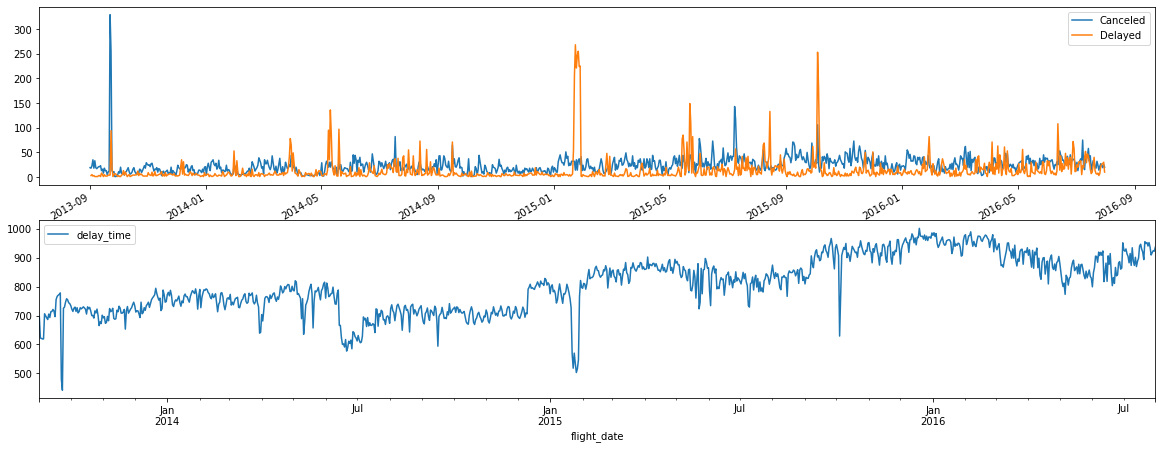

In [14]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

cancel_flights[['flight_date','delay_time']].groupby(['flight_date']).count().plot(ax=ax[0])
delayed_flights[['flight_date','delay_time']].groupby(['flight_date']).count().plot(ax=ax[0])
ontime_flights[['flight_date','delay_time']].groupby(['flight_date']).count().plot(ax=ax[1])

ax[0].legend(["Canceled", "Delayed"])

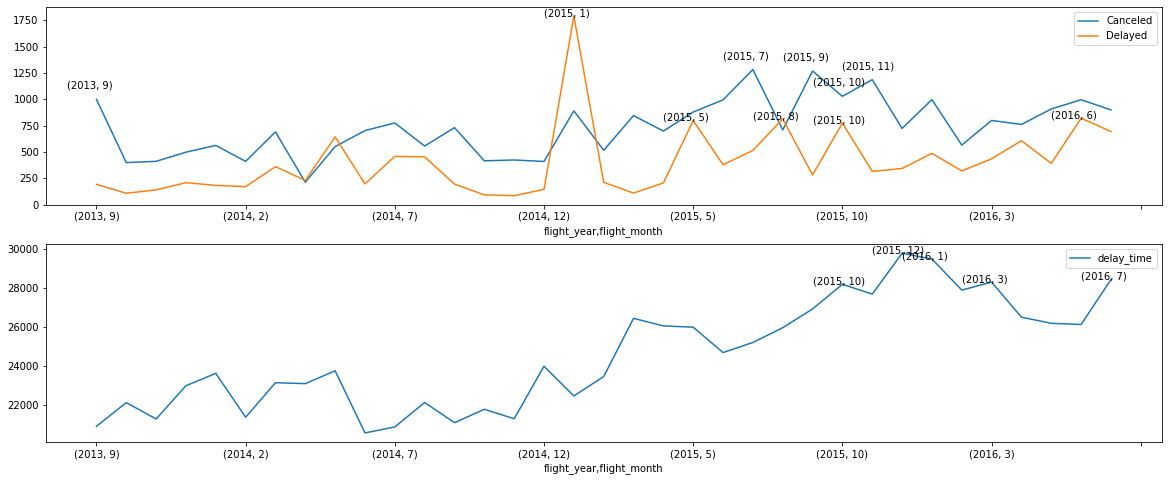

In [108]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

cancel_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().plot(ax=ax[0])
delayed_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().plot(ax=ax[0])
ontime_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().plot(ax=ax[1])

ax[0].legend(["Canceled", "Delayed"])

for idx, row in cancel_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.flight_year}, {row.flight_month})", (idx-1, row.delay_time+100))
for idx, row in delayed_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.flight_year}, {row.flight_month})", (idx-1, row.delay_time))
for idx, row in ontime_flights[['flight_year', 'flight_month','delay_time']].groupby(['flight_year', 'flight_month']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[1].annotate(f"({row.flight_year}, {row.flight_month})", (idx-1, row.delay_time))

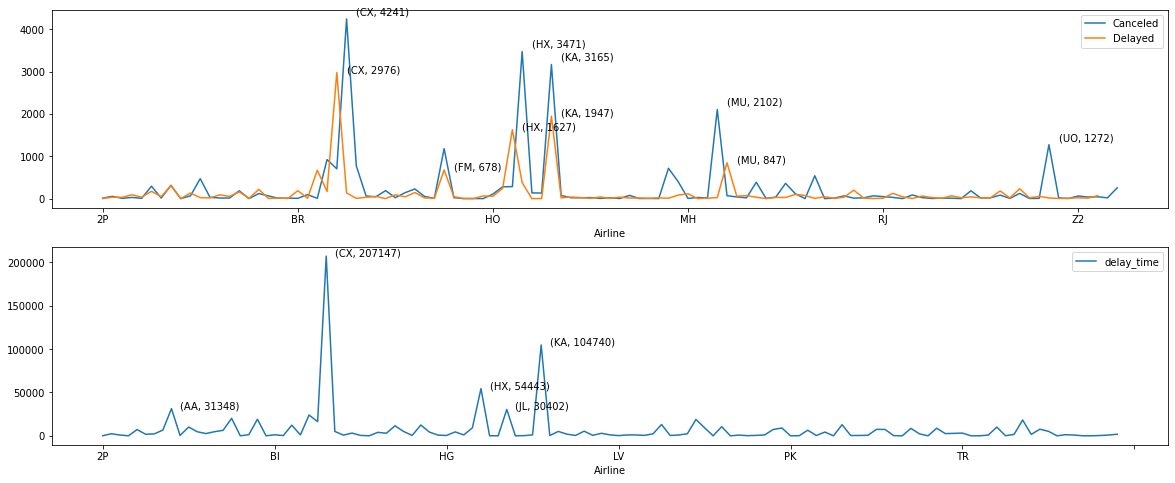

In [103]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

cancel_flights[['Airline','delay_time']].groupby(['Airline']).count().plot(ax=ax[0])
delayed_flights[['Airline','delay_time']].groupby(['Airline']).count().plot(ax=ax[0])
ontime_flights[['Airline','delay_time']].groupby(['Airline']).count().plot(ax=ax[1])

ax[0].legend(["Canceled", "Delayed"])
for idx, row in cancel_flights[['Airline','delay_time']].groupby(['Airline']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.Airline}, {row.delay_time})", (idx+1, row.delay_time+100))
for idx, row in delayed_flights[['Airline','delay_time']].groupby(['Airline']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.Airline}, {row.delay_time})", (idx+1, row.delay_time))
for idx, row in ontime_flights[['Airline','delay_time']].groupby(['Airline']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[1].annotate(f"({row.Airline}, {row.delay_time})", (idx+1, row.delay_time))

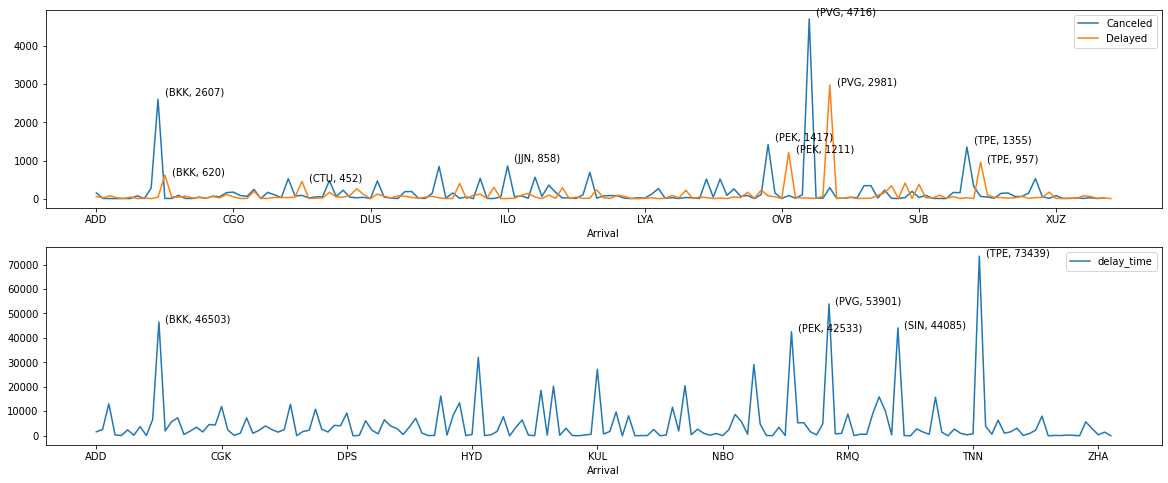

In [101]:
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

cancel_flights[['Arrival','delay_time']].groupby(['Arrival']).count().plot(ax=ax[0])
delayed_flights[['Arrival','delay_time']].groupby(['Arrival']).count().plot(ax=ax[0])
ontime_flights[['Arrival','delay_time']].groupby(['Arrival']).count().plot(ax=ax[1])

ax[0].legend(["Canceled", "Delayed"])
for idx, row in cancel_flights[['Arrival','delay_time']].groupby(['Arrival']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.Arrival}, {row.delay_time})", (idx+1, row.delay_time+100))
for idx, row in delayed_flights[['Arrival','delay_time']].groupby(['Arrival']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[0].annotate(f"({row.Arrival}, {row.delay_time})", (idx+1, row.delay_time))
for idx, row in ontime_flights[['Arrival','delay_time']].groupby(['Arrival']).count().reset_index().sort_values(by=["delay_time"], ascending=False).head().iterrows():
    ax[1].annotate(f"({row.Arrival}, {row.delay_time})", (idx+1, row.delay_time))

In [16]:
label = df.pop("label")
df.pop("flight_id")
df.pop("flight_no")
df.pop("Departure")
df.pop("Arrival")
df.pop("Airline")
df.pop("is_claim")
df.pop("flight_date")
data = df

In [17]:
corr = df.corr()

In [18]:
corr.style.background_gradient()

,Week,std_hour,delay_time,Arrival_enc,Airline_enc,flight_year,flight_month,flight_day
Week,1.000000,-0.000176,0.000285,-0.000057,0.001449,-0.428666,0.996447,0.096420
std_hour,-0.000176,1.000000,0.001303,-0.029533,0.019807,-0.003853,-0.000176,-0.000377
delay_time,0.000285,0.001303,1.000000,0.000751,0.023776,0.015390,0.001405,-0.010365
Arrival_enc,-0.000057,-0.029533,0.000751,1.000000,-0.042319,-0.027319,-0.000035,0.000072
Airline_enc,0.001449,0.019807,0.023776,-0.042319,1.000000,-0.004888,0.001485,-0.000596
flight_year,-0.428666,-0.003853,0.015390,-0.027319,-0.004888,1.000000,-0.431298,-0.003407
flight_month,0.996447,-0.000176,0.001405,-0.000035,0.001485,-0.431298,1.000000,0.014613
flight_day,0.096420,-0.000377,-0.010365,0.000072,-0.000596,-0.003407,0.014613,1.000000


In [19]:
from tpot import TPOTClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/home/tim/.local/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/tim/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [20]:
xgb = XGBClassifier(n_estimators=100,
                    max_depth=6,
                    learning_rate=0.5,
                    n_jobs=6,
                    verbosity=0)
len_features = len(data.columns)
#pylint:disable=invalid-name
X_train, _, y_train, _ = train_test_split(data,
                                          label.values,
                                          train_size=0.75,
                                          test_size=0.25,
                                          random_state=39)


In [21]:
sfs = SFS(xgb,
          k_features=(1, len_features),
          forward=True,
          floating=True,
          verbose=1,
          scoring='neg_mean_absolute_error',
          cv=5,
          n_jobs=6)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
/home/tim/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tim/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tim/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/tim/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed

KeyError: None

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
%matplotlib inline